# SUPERSTORE SALES FORECAST

## 1. Importar Datos

In [34]:
# Importar Librerias
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [26]:
# Importar Datos

serie = pd.read_csv('Serie de Tiempo.csv')
serie

,YEAR,MONTH,SALES
0,2014,1,14236.8950
1,2014,2,4519.8920
2,2014,3,55691.0090
3,2014,4,28295.3450
4,2014,5,23648.2870
5,2014,6,34595.1276
6,2014,7,33946.3930
7,2014,8,27909.4685
8,2014,9,81777.3508
9,2014,10,31453.3930


In [46]:
# Unir 'YEAR' y 'MONTH' en una sola columna de fecha
serie['DATE'] = pd.to_datetime(serie['YEAR'].astype(str) + '-' + serie['MONTH'].astype(str))

# 'DATE' como el índice del DataFrame
serie.set_index('DATE', inplace=True)

## 2. Implementación del Modelo

In [27]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba 
# 3 años de entrenamiento y 1 año de prueba
train_data = serie.iloc[:-12]  # Excluir los últimos 12 meses
test_data = serie.iloc[-12:]   # Últimos 12 meses para prueba

# Ajustar un modelo SARIMA utilizando solo el conjunto de entrenamiento
modelo_sarima = SARIMAX(train_data['SALES'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
ajuste_sarima = modelo_sarima.fit()

# Pronosticar los próximos doce meses
pronostico = ajuste_sarima.forecast(steps=12)

C:\Users\Camilo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [31]:
# Calcular la métrica de precisión (por ejemplo, error cuadrático medio, MSE)
mse = mean_squared_error(test_data['SALES'], pronostico)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE):96862692.8585098


In [32]:
mape = np.mean(np.abs((test_data['SALES'] - pronostico) / test_data['SALES'])) * 100
print("Error Porcentual Absoluto Medio (MAPE):", mape, "%")

Error Porcentual Absoluto Medio (MAPE): 9.71456 %


## 3. Sales Forecast 2018

In [47]:
# Ajustar un modelo SARIMA
modelo_sarima = SARIMAX(serie['SALES'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
ajuste_sarima = modelo_sarima.fit()

# Pronosticar los próximos doce meses
pronostico = ajuste_sarima.forecast(steps=12)

# Imprimir los pronósticos
print(pronostico)

C:\Users\Camilo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Camilo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Camilo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2018-01-01     43779.923997
2018-02-01     34645.617833
2018-03-01     70715.336447
2018-04-01     54275.318745
2018-05-01     62701.487303
2018-06-01     63612.261428
2018-07-01     59720.257528
2018-08-01     68048.348346
2018-09-01     98285.872577
2018-10-01     82608.130476
2018-11-01    117466.753376
2018-12-01    102350.007814
Freq: MS, Name: predicted_mean, dtype: float64


In [52]:
serie_df = pd.DataFrame(serie).reset_index()
serie_df

,DATE,YEAR,MONTH,SALES
0,2014-01-01,2014,1,14236.8950
1,2014-02-01,2014,2,4519.8920
2,2014-03-01,2014,3,55691.0090
3,2014-04-01,2014,4,28295.3450
4,2014-05-01,2014,5,23648.2870
5,2014-06-01,2014,6,34595.1276
6,2014-07-01,2014,7,33946.3930
7,2014-08-01,2014,8,27909.4685
8,2014-09-01,2014,9,81777.3508
9,2014-10-01,2014,10,31453.3930


In [54]:
prono_df = pd.DataFrame(pronostico).reset_index()
prono_df.columns = ['DATE', 'SALES']
prono_df

,DATE,SALES
0,2018-01-01,43779.923997
1,2018-02-01,34645.617833
2,2018-03-01,70715.336447
3,2018-04-01,54275.318745
4,2018-05-01,62701.487303
5,2018-06-01,63612.261428
6,2018-07-01,59720.257528
7,2018-08-01,68048.348346
8,2018-09-01,98285.872577
9,2018-10-01,82608.130476


In [56]:
# Convertir la columna 'DATE' a formato datetime
prono_df['DATE'] = pd.to_datetime(prono_df['DATE'])

# Crear las columnas 'AÑO' y 'MES'
prono_df['YEAR'] = prono_df['DATE'].dt.year
prono_df['MONTH'] = prono_df['DATE'].dt.month

# Mostrar el DataFrame resultante
print(prono_df)

         DATE          SALES   AÑO  MES  YEAR  MONTH
0  2018-01-01   43779.923997  2018    1  2018      1
1  2018-02-01   34645.617833  2018    2  2018      2
2  2018-03-01   70715.336447  2018    3  2018      3
3  2018-04-01   54275.318745  2018    4  2018      4
4  2018-05-01   62701.487303  2018    5  2018      5
5  2018-06-01   63612.261428  2018    6  2018      6
6  2018-07-01   59720.257528  2018    7  2018      7
7  2018-08-01   68048.348346  2018    8  2018      8
8  2018-09-01   98285.872577  2018    9  2018      9
9  2018-10-01   82608.130476  2018   10  2018     10
10 2018-11-01  117466.753376  2018   11  2018     11
11 2018-12-01  102350.007814  2018   12  2018     12


In [60]:
prono_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    12 non-null     datetime64[ns]
 1   SALES   12 non-null     float64       
 2   YEAR    12 non-null     int32         
 3   MONTH   12 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 420.0 bytes


In [62]:
serie['DATE'] = pd.to_datetime(serie['YEAR'].astype(str) + '-' + serie['MONTH'].astype(str))

In [63]:
serie = pd.concat([serie, prono_df], axis=0)
serie

,YEAR,MONTH,SALES,DATE
2014-01-01 00:00:00,2014,1,14236.895000,2014-01-01
2014-02-01 00:00:00,2014,2,4519.892000,2014-02-01
2014-03-01 00:00:00,2014,3,55691.009000,2014-03-01
2014-04-01 00:00:00,2014,4,28295.345000,2014-04-01
2014-05-01 00:00:00,2014,5,23648.287000,2014-05-01
2014-06-01 00:00:00,2014,6,34595.127600,2014-06-01
2014-07-01 00:00:00,2014,7,33946.393000,2014-07-01
2014-08-01 00:00:00,2014,8,27909.468500,2014-08-01
2014-09-01 00:00:00,2014,9,81777.350800,2014-09-01
2014-10-01 00:00:00,2014,10,31453.393000,2014-10-01


## 4. Gráfica de Serie de Tiempo

In [64]:
# Eliminar el índice del DataFrame
serie.reset_index(drop=True, inplace=True)
serie

,YEAR,MONTH,SALES,DATE
0,2014,1,14236.895000,2014-01-01
1,2014,2,4519.892000,2014-02-01
2,2014,3,55691.009000,2014-03-01
3,2014,4,28295.345000,2014-04-01
4,2014,5,23648.287000,2014-05-01
5,2014,6,34595.127600,2014-06-01
6,2014,7,33946.393000,2014-07-01
7,2014,8,27909.468500,2014-08-01
8,2014,9,81777.350800,2014-09-01
9,2014,10,31453.393000,2014-10-01


In [71]:
# Agrupar los datos por año y mes
grouped = serie.groupby([serie.YEAR, serie.MONTH])["SALES"].sum()

type(grouped)

pandas.core.series.Series

In [79]:
serie

,YEAR,MONTH,SALES,DATE
0,2014,1,14236.895000,2014-01-01
1,2014,2,4519.892000,2014-02-01
2,2014,3,55691.009000,2014-03-01
3,2014,4,28295.345000,2014-04-01
4,2014,5,23648.287000,2014-05-01
5,2014,6,34595.127600,2014-06-01
6,2014,7,33946.393000,2014-07-01
7,2014,8,27909.468500,2014-08-01
8,2014,9,81777.350800,2014-09-01
9,2014,10,31453.393000,2014-10-01


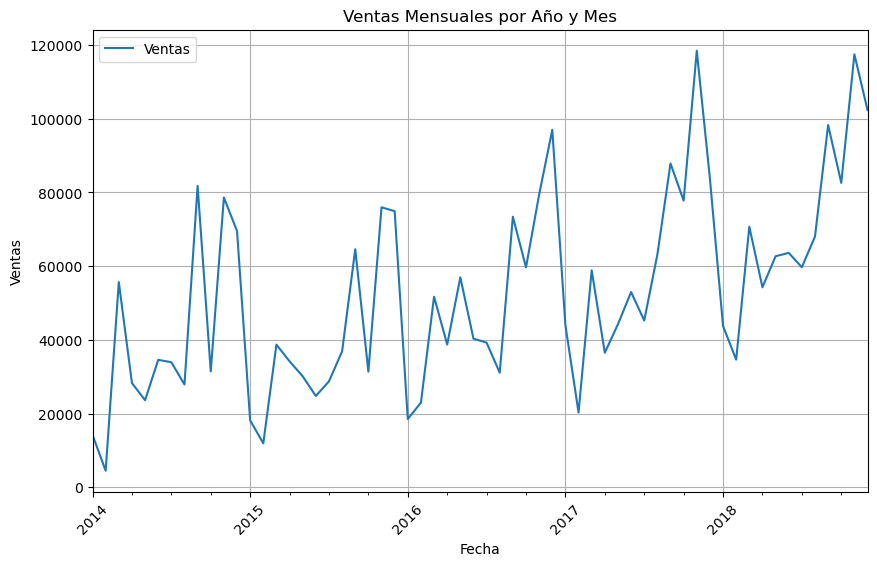

In [81]:
# Graficar la serie
serie.plot(x='DATE', y='SALES', figsize=(10, 6))

# Personalizar la gráfica
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas Mensuales por Año y Mes')
plt.legend(['Ventas'])
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(True)
plt.show()